- In some contexts, such as **medical imaging applications** involving, say, **CT (computed tomography) scans**, we typically deal with **sequences of images stacked along the head-to-foot axis**, **each corresponding to a slice across the human body**.
- In CT scans, the **intensity** represents the **density of the different parts of the body** - **lungs, fat, water, muscle, and bone, in order of increasing density** - **mapped from dark to bright** when the CT scan is displayed on a clinical workstation.
- The density at each point is computed from the amount of X-rays reaching a detector **after crossing through the body**, with some complex math to deconvolve the raw sensor data into the full volume.
- CTs have only a single intensity channel, similar to a grayscale image. (なので、ofte, the channel dimension is left out in native data formats)

In [5]:
from PIL import Image
import imageio
import torch

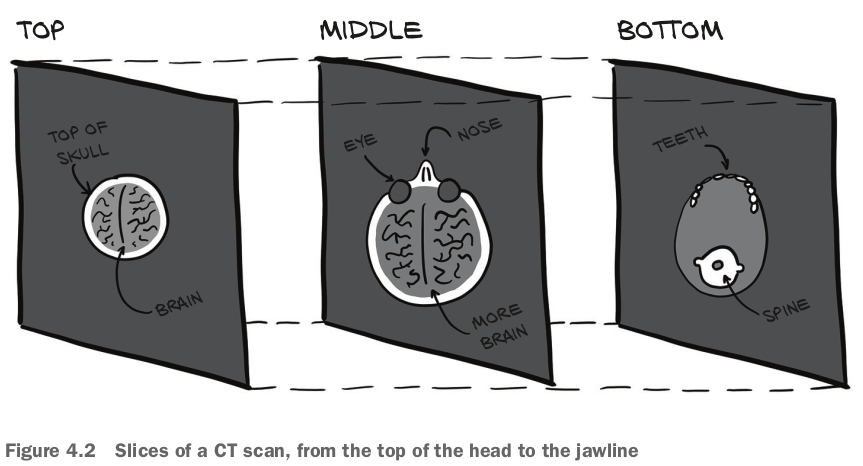

In [2]:
Image.open('img/slices-of-ct-scan-2020-12-14-12-20-46.png')

- The extra dimension represents **an offset in physical space**, rather than a particular band of the visible spectrum.
- We just have an extra dimension, *depth*, after the *channel* dimension, leading to a 5D tensor of shape `N x C x D x H x W`.
### 4.2.1 Loading a specialized format
- `volread` function: takes a directory as an argument and assembles all Digital Imaging and Communications in Medicine (DICOM) files (https://wiki.cancerimagingarchive.net/display/Public/CPTAC-LSCC#dd4a08a246524596add33b9f8f00f288) in a series in a NumPy 3D array.

In [4]:
dir_path = '../data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083/'
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 65/99  (65.799/99  (100.0%)


(99, 512, 512)

- Make room for the `channel` dimension using `unsqueeze`:

In [6]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 99, 512, 512])